## Single day schedule data extraction and summarization

In [1]:
example_date = '2015-12-03'
gtfs_path = '/gpfs2/projects/project-bus_capstone_2016/workspace/share/gtfs/'
code_filepath = '..'

import os
import pandas as pd
import numpy as np
%matplotlib inline

# these modules are homemade
os.chdir(code_filepath)
import ttools
import gtfs

In [2]:
# get all the schedule data. (subset can be created later)
trips = gtfs.load_trips(example_date,gtfs_path)
stops = gtfs.load_stops(example_date,gtfs_path)
stop_times, tz_sched = gtfs.load_stop_times(example_date,gtfs_path)
tcal=gtfs.TransitCalendar(example_date,gtfs_path)

In [3]:
active_services = tcal.get_service_ids(example_date)
active_trips = trips.service_id.isin(active_services)
active_stop_times = stop_times.reset_index().set_index('trip_id').loc[active_trips]
print 'Finished loading GTFS data.'

Finished loading GTFS data.


In [4]:
active_stop_times.set_index('stop_id',append=True,inplace=True)

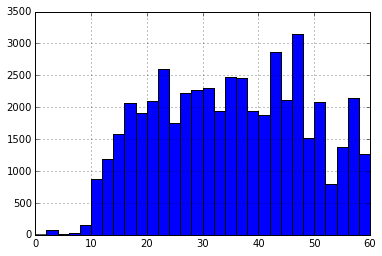

In [5]:
active_stop_times.groupby(level=0).size().hist(range=(0,60),bins=30)

In [6]:
print len(active_stop_times)
print sum(active_trips)
print 1.0*len(active_stop_times)/sum(active_trips)

2064230
54272
38.0348982901


In [7]:
active_stop_times['arrival_time'] = pd.to_timedelta(active_stop_times['arrival_time'])
active_stop_times['departure_time'] = pd.to_timedelta(active_stop_times['departure_time'])

In [8]:
trip_durations = active_stop_times.groupby(level=(0))['arrival_time'].max()- active_stop_times.groupby(level=(0))['arrival_time'].min()

In [9]:
trip_durations.describe()

count                     54272
mean     0 days 00:48:38.765975
std      0 days 00:21:33.547153
min             0 days 00:02:00
25%             0 days 00:32:00
50%             0 days 00:46:00
75%             0 days 01:02:00
max             0 days 02:52:00
Name: arrival_time, dtype: object

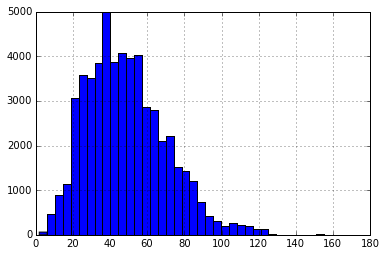

In [10]:
(trip_durations/ttools.datetime.timedelta(minutes=1)).hist(bins=40)

In [11]:
list(trip_durations[trip_durations < ttools.datetime.timedelta(minutes=5)].index)

['9911403-SCPD5-SC_D5-Weekday-10-SDon',
 '9911404-SCPD5-SC_D5-Weekday-10-SDon',
 '9911405-SCPD5-SC_D5-Weekday-10-SDon',
 '9911406-SCPD5-SC_D5-Weekday-10-SDon',
 '9911414-SCPD5-SC_D5-Weekday-10-SDon',
 'GA_D5-Weekday-SDon-115800_B60_728',
 'GA_D5-Weekday-SDon-118800_B60_728',
 'GA_D5-Weekday-SDon-121800_B60_728',
 'GA_D5-Weekday-SDon-124800_B60_728',
 'GA_D5-Weekday-SDon-127800_B60_728',
 'GH_D5-Weekday-SDon-030000_SBS12_201',
 'GH_D5-Weekday-SDon-032000_SBS12_202',
 'GH_D5-Weekday-SDon-034000_SBS12_204',
 'GH_D5-Weekday-SDon-036000_SBS12_207',
 'GH_D5-Weekday-SDon-038000_SBS12_211']

In [12]:
trips.loc['GA_D5-Weekday-SDon-118800_B60_728']

block_id                               NaN
direction_id                             0
route_id                               B39
service_id              GA_D5-Weekday-SDon
shape_id                           B390024
trip_headsign    WILLIAMSBURG BRIDGE PLAZA
Name: GA_D5-Weekday-SDon-118800_B60_728, dtype: object

In [13]:
stop_times.loc['GA_D5-Weekday-SDon-118800_B60_728']

,arrival_time,departure_time,stop_sequence,pickup_type,drop_off_type
stop_id,,,,,
403647,19:48:00,19:48:00,1,0,0
804174,19:48:15,19:48:15,2,0,0
801012,19:52:00,19:52:00,3,0,0
